<a href="https://colab.research.google.com/github/afaqahmed91/deeplearning/blob/main/notebooks/indoor_temperature_predictor/sarimax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TimeSeries Analysis using SARIMAX


In [ ]:
# add the path to the root folder
path_to_main = "../../"

In [ ]:
import sys

sys.path.append(path_to_main)

In [ ]:
import pandas as pd
# from src.data.load_traning_data import load, combine
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
data = load(path_to_data_folder=path_to_main)

In [ ]:
data = load(path_to_data_folder=path_to_main)
combined_df = combine(data)
combine_X = combined_df.drop("ZAT", axis=1)
Y = combined_df["ZAT"]

In [ ]:
combined_df.to_csv(f"{path_to_main}data/processed/combined.csv", index=True)

In [ ]:
combined_df.isna().any()

AHU 1#setpoint                                  False
AHU 1#fan                                       False
AHU 1#sensor                                    False
Primary HW1#sensor                              False
Primary HW1#setpoint                            False
Secondary HW.Radiators.HeatingCurve#sensor      False
Secondary HW.Radiators.HeatingCurve#setpoint    False
DD                                              False
FH                                              False
temperature                                     False
ghi                                             False
R                                               False
S                                               False
U                                               False
ZAT                                             False
dtype: bool

In [1]:
!wget https://raw.githubusercontent.com/afaqahmed91/deeplearning/main/processed_data/combined.csv

--2024-06-15 18:06:03--  https://raw.githubusercontent.com/afaqahmed91/deeplearning/main/processed_data/combined.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6088261 (5.8M) [text/plain]
Saving to: ‘combined.csv.1’

combined.csv.1      100%[===================>]   5.81M  19.9MB/s    in 0.3s    

2024-06-15 18:06:04 (19.9 MB/s) - ‘combined.csv.1’ saved [6088261/6088261]



In [2]:
! pip install pmdarima

In [3]:

!head combined.csv

datetime,AHU 1#setpoint,AHU 1#fan,AHU 1#sensor,Primary HW1#sensor,Primary HW1#setpoint,Secondary HW.Radiators.HeatingCurve#sensor,Secondary HW.Radiators.HeatingCurve#setpoint,DD,FH,temperature,ghi,R,S,U,ZAT
2020-06-09 00:00:00+00:00,22.200000762939453,1.0,20.94499969482422,29.25666618347168,20.0,29.25666618347168,20.0,10.0,4.0,11.2,0.0,0.0,0.0,71.0,21.182708263397217
2020-06-09 01:00:00+00:00,22.200000762939453,1.0,20.795000076293945,28.20499992370605,20.0,28.20499992370605,20.0,360.0,3.0,9.8,0.0,0.0,0.0,76.0,21.016406655311584
2020-06-09 02:00:00+00:00,22.200000762939453,1.0,20.643333435058597,27.343334197998047,20.0,27.343334197998047,20.0,330.0,2.0,9.4,0.0,0.0,0.0,82.0,20.873104453086853
2020-06-09 03:00:00+00:00,22.200000762939453,0.0,20.831666946411133,26.678333282470703,20.0,26.678333282470703,20.0,350.0,2.0,11.0,5.555560000000001,0.0,0.0,75.0,20.929020881652832
2020-06-09 04:00:00+00:00,22.200000762939453,0.1964285671710968,20.553571701049805,37.41607284545898,40.04999923706055,

In [4]:
import pandas as pd
combined_df = pd.read_csv("combined.csv", index_col = "datetime")
combined_df.index = pd.to_datetime(combined_df.index, utc=True)
combined_df = combined_df.asfreq("h")

In [5]:
combine_X = combined_df.drop("ZAT", axis=1)
Y = combined_df["ZAT"]

In [6]:
X_train = combine_X.loc[:"2023-12-31"]
X_test = combine_X.loc["2024-01-01":]
y_train = Y.loc[:"2023-12-31"]
y_test = Y.loc["2024-01-01":]

In [7]:
# Load specific forecasting tools
from statsmodels.tsa.statespace.sarimax import SARIMAX, SARIMAXResults

from statsmodels.graphics.tsaplots import (
    plot_acf,
    plot_pacf,
)  # for determining (p,q) orders
from statsmodels.tsa.seasonal import seasonal_decompose  # for ETS Plots
from pmdarima import auto_arima  # fo

In [8]:
combined_df.head()

,AHU 1#setpoint,AHU 1#fan,AHU 1#sensor,Primary HW1#sensor,Primary HW1#setpoint,Secondary HW.Radiators.HeatingCurve#sensor,Secondary HW.Radiators.HeatingCurve#setpoint,DD,FH,temperature,ghi,R,S,U,ZAT
datetime,,,,,,,,,,,,,,,
2020-06-09 00:00:00+00:00,22.200001,1.000000,20.945000,29.256666,20.000000,29.256666,20.000000,10.0,4.0,11.2,0.00000,0.0,0.0,71.0,21.182708
2020-06-09 01:00:00+00:00,22.200001,1.000000,20.795000,28.205000,20.000000,28.205000,20.000000,360.0,3.0,9.8,0.00000,0.0,0.0,76.0,21.016407
2020-06-09 02:00:00+00:00,22.200001,1.000000,20.643333,27.343334,20.000000,27.343334,20.000000,330.0,2.0,9.4,0.00000,0.0,0.0,82.0,20.873104
2020-06-09 03:00:00+00:00,22.200001,0.000000,20.831667,26.678333,20.000000,26.678333,20.000000,350.0,2.0,11.0,5.55556,0.0,0.0,75.0,20.929021
2020-06-09 04:00:00+00:00,22.200001,0.196429,20.553572,37.416073,40.049999,37.416073,38.455357,360.0,3.0,11.3,19.44446,0.0,0.0,72.0,21.080411


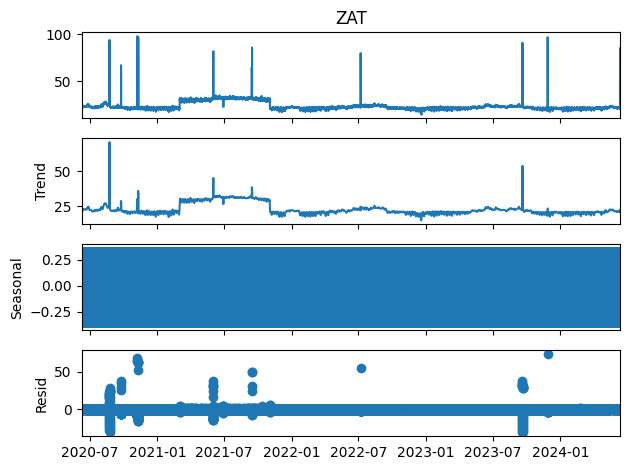

In [9]:
result = seasonal_decompose(Y, model="add")
result.plot();

<Axes: xlabel='datetime'>

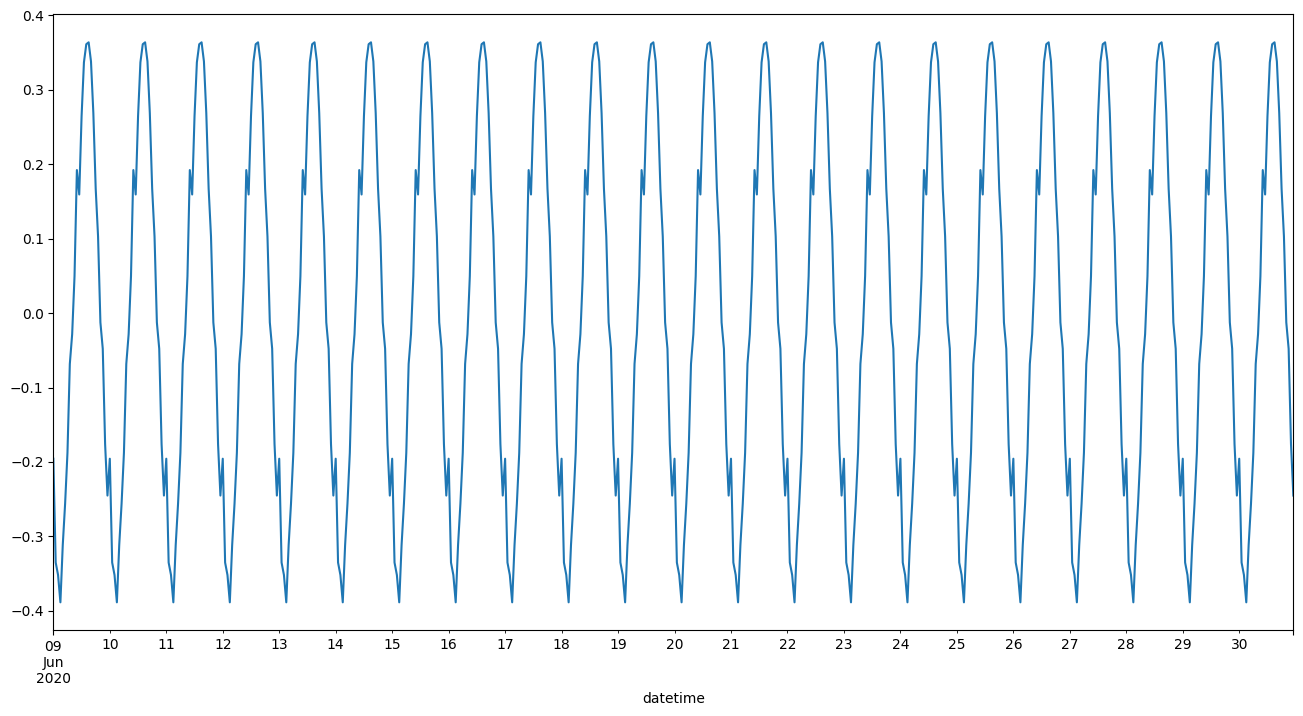

In [10]:
result.seasonal["2020-06"].plot(figsize=(16, 8))

In [11]:
# For SARIMA Orders we set seasonal=True and pass in an m value
fit = auto_arima(
    Y['2023'],
    seasonal=True,
    m=24,
    trace=True,
    error_action="ignore",  # we don't want to know if an order does not work
    suppress_warnings=True,  # we don't want convergence warnings
    stepwise=True,
)
fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[24] intercept   : AIC=31197.211, Time=69.44 sec
 ARIMA(0,1,0)(0,0,0)[24] intercept   : AIC=31987.639, Time=0.28 sec
 ARIMA(1,1,0)(1,0,0)[24] intercept   : AIC=31288.735, Time=5.52 sec
 ARIMA(0,1,1)(0,0,1)[24] intercept   : AIC=31193.394, Time=6.44 sec
 ARIMA(0,1,0)(0,0,0)[24]             : AIC=31985.639, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[24] intercept   : AIC=31191.739, Time=1.76 sec
 ARIMA(0,1,1)(1,0,0)[24] intercept   : AIC=31193.391, Time=6.04 sec
 ARIMA(0,1,1)(1,0,1)[24] intercept   : AIC=31195.394, Time=7.72 sec
 ARIMA(1,1,1)(0,0,0)[24] intercept   : AIC=31190.697, Time=2.65 sec
 ARIMA(1,1,1)(1,0,0)[24] intercept   : AIC=31192.335, Time=13.25 sec
 ARIMA(1,1,1)(0,0,1)[24] intercept   : AIC=31192.338, Time=13.33 sec
 ARIMA(1,1,1)(1,0,1)[24] intercept   : AIC=31194.337, Time=17.02 sec
 ARIMA(1,1,0)(0,0,0)[24] intercept   : AIC=31286.972, Time=0.43 sec
 ARIMA(2,1,1)(0,0,0)[24] intercept   : AIC=31192.139, Time=2.89 sec
 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 8760
Model:               SARIMAX(1, 1, 1)   Log Likelihood              -15591.349
Date:                Sat, 15 Jun 2024   AIC                          31188.697
Time:                        18:10:31   BIC                          31209.931
Sample:                    01-01-2023   HQIC                         31195.932
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0603      0.005     11.467      0.000       0.050       0.071
ma.L1         -0.3692      0.005    -69.741      0.000      -0.380      -0.359
sigma2         2.0589      0.001   2031.309      0.000       2.057       2.061
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):        1464951786.37
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):             138.71   Skew:                            14.76
Prob(H) (two-sided):                  0.00   Kurtosis:                      2006.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [12]:
model = SARIMAX(endog=y_train, order=(1, 1, 1), seasonal_order=(0, 0, 0, 24))
results: SARIMAXResults = model.fit()

In [13]:
start = len(y_train)
end = start + len(y_test) - 1
predictions = results.predict(start=start, end=end)


<Axes: xlabel='datetime'>

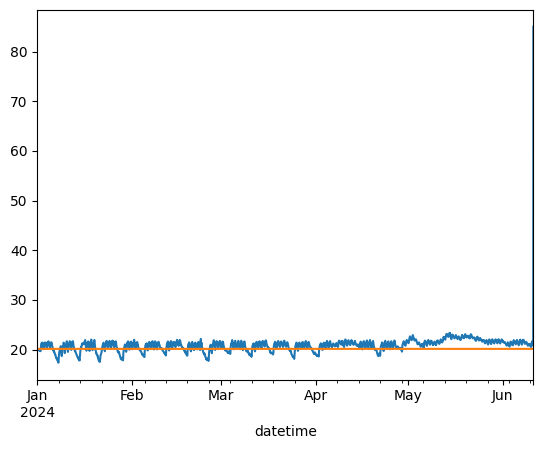

In [14]:
y_test.plot()
predictions.plot()

In [15]:
predictions

2024-01-01 00:00:00+00:00    20.132194
2024-01-01 01:00:00+00:00    20.128724
2024-01-01 02:00:00+00:00    20.129557
2024-01-01 03:00:00+00:00    20.129357
2024-01-01 04:00:00+00:00    20.129405
                               ...    
2024-06-10 19:00:00+00:00    20.129396
2024-06-10 20:00:00+00:00    20.129396
2024-06-10 21:00:00+00:00    20.129396
2024-06-10 22:00:00+00:00    20.129396
2024-06-10 23:00:00+00:00    20.129396
Freq: H, Name: predicted_mean, Length: 3888, dtype: float64